In [1]:
import numpy as np
from astropy.io import fits
from scipy.ndimage import zoom, rotate
import glob
import matplotlib.pyplot as plt
from shanalyzefull import shgridcenter
from sh_analysisfxns_pb import raw_to_npy


In [2]:
shwfdir = '/home/pbenac/home/Thesis/raw_SHWF_images'
filelist = glob.glob(shwfdir + '/SHWF*.raw')
filelist.sort()

In [3]:
filelist

['/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10232020_100umpinh_REFIMG_roomlights.raw',
 '/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10232020_1mmpinh_callamps.raw',
 '/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10282020_1mmpinh_callamps_afterrealign.raw',
 '/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmph_bothmircolocated.raw',
 '/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_flatmir.raw',
 '/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_flatmir_300msexpo.raw',
 '/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_flatmir_500msexpo.raw',
 '/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_flatmirror_500ms_redone.raw',
 '/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_mirror1.raw',
 '/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_mirror2.raw',
 '/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-11042020_newsourse_100umpinh.raw',
 '/

In [5]:
[data, images] = raw_to_npy(filelist)


/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10232020_100umpinh_REFIMG_roomlights.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10232020_1mmpinh_callamps.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10282020_1mmpinh_callamps_afterrealign.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmph_bothmircolocated.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_flatmir.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_flatmir_300msexpo.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_flatmir_500msexpo.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_flatmirror_500ms_redone.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_mirror1.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-10302020_1mmpinh_callamps_mirror2.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-11042020_newsourse_100umpinh.raw
/home/pbenac/home/Thesis/raw_SHWF_images/SHWF-1

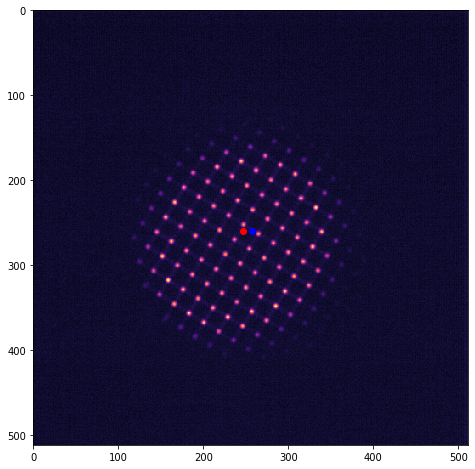

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(images[1], cmap='magma')

circular_img = images[1]
cen_19 = shgridcenter(circular_img, gridspacing=19)
plt.plot(cen_19[0]+circular_img.shape[1]/2, cen_19[1]+circular_img.shape[0]/2, marker='o', color='red')

cen_14 = shgridcenter(circular_img, gridspacing=14)
plt.plot(cen_14[0]+circular_img.shape[1]/2, cen_14[1]+circular_img.shape[0]/2, marker='o', color='blue')

# By counting, I can see that the tilted-x-dir. rows has a max of ~12 spots, tilted-y-dir. columns have 12 or 13
# the red and blue spots don't seem to be right, esp. in the quasi-y-direction

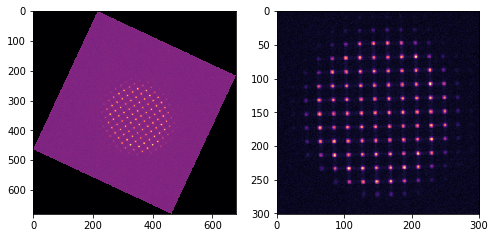

In [48]:
#What if we rotated the image before putting shgridcenter on it?
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(rotate(circular_img, 65), cmap='magma')
plt.subplot(122)
plt.imshow(rotate(circular_img, 33)[225:526, 200:501], cmap='magma')


rot_angle = 33
rot_crop_img = rotate(circular_img, rot_angle)[225:525, 200:500] 

In [49]:
print(rot_crop_img.shape)

(300, 300)


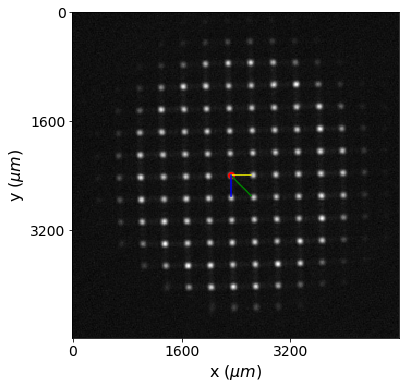

In [68]:
plt.figure(figsize=(6,6))
plt.imshow(rot_crop_img, cmap='gray')
arr = np.arange(0, stop=300, step=0.1875)
#plt.xticks(arr, arr*1600)
#plt.yticks(arr, arr*1600)
plt.xticks([0, 100, 200, 300], [0, 1600, 3200, 4800], fontsize=14)
plt.yticks([0, 100, 200, 300], [0, 1600, 3200, 4800], fontsize=14)
plt.xlabel(r'x ($\mu m$)', fontsize=16)
plt.ylabel(r'y ($\mu m$)',fontsize=16)

[xcen, ycen] = shgridcenter(rot_crop_img, gridspacing=16)
plt.plot(xcen+rot_crop_img.shape[1]/2, ycen+rot_crop_img.shape[0]/2, marker='o', color='red')

[xcen, ycen] = shgridcenter(rot_crop_img, gridspacing=19)
# Plot some rays of length = expected separation b/n spots (300um, or 18.75 pix on a 16um um/pix chip)
plt.plot([xcen+rot_crop_img.shape[1]/2, 18.75+xcen+rot_crop_img.shape[1]/2], [ycen+rot_crop_img.shape[0]/2, 18.75+ycen+rot_crop_img.shape[0]/2], color='green')
plt.plot([xcen+rot_crop_img.shape[1]/2, 18.75+xcen+rot_crop_img.shape[1]/2], [ycen+rot_crop_img.shape[0]/2, ycen+rot_crop_img.shape[0]/2], color='yellow')
plt.plot([xcen+rot_crop_img.shape[1]/2, xcen+rot_crop_img.shape[1]/2], [ycen+rot_crop_img.shape[0]/2, 18.75+ycen+rot_crop_img.shape[0]/2], color='blue')
# Question I have: So, does it try to choose a *spot* that's closest to the center? because it did that here but not in the rotated version 
## Answer: Seems to be yes - np.argmax() returns the location of the maximum
# This result is more robust against changes in grid spacing, whereas the tilted(rotated) version changed w/ changes in grid spacing

# We can use this to calculate the expected positions of all spots.

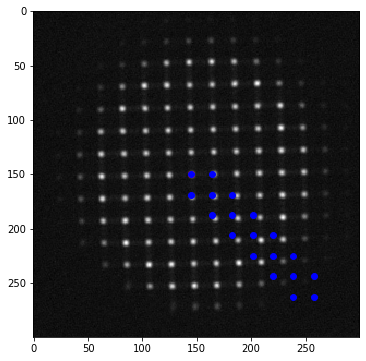

In [133]:
straight_image = rot_crop_img

separation_um = 300
pix_size_um = 16
separation_pix = separation_um/pix_size_um
npix = 300 # Chosen above when I cropped the image
total_width_um = 4800 # actually 5000 (5mm) but w/ cropping to 300x300 it becomes 4800.
total_width_pix = npix

[xcen, ycen] = shgridcenter(straight_image, gridspacing=19)
center_spot_pos = (xcen+straight_image.shape[1]/2, ycen+straight_image.shape[0]/2)

# first: increment x direction
new_spot_pos_x = (separation_pix+xcen+straight_image.shape[1]/2, ycen+straight_image.shape[0]/2)
new_spot_pos_y = (xcen+straight_image.shape[1]/2, separation_pix+ycen+straight_image.shape[0]/2)


max_separation_pix = total_width_pix / 2
# what do i want to iterate over? Options: number of spots, radial distance in pix, radial distance in um
spot_positions = []
spot_positions.append(center_spot_pos)
new_xval = center_spot_pos[0]
new_yval = center_spot_pos[1]
while np.sqrt((new_xval - center_spot_pos[0])**2 + (new_yval - center_spot_pos[1])**2) <= max_separation_pix:
    current_spot_pos = spot_positions[-1] # last spot added
    new_xval = separation_pix + current_spot_pos[0]
    new_yval = separation_pix + current_spot_pos[1]
    # Spot to the right:
    spot_positions.append((new_xval, current_spot_pos[1])) # new x, same y
    # Spot above:
    spot_positions.append((current_spot_pos[0], new_yval)) # same x, new y
    # Positive diagonal spot
    spot_positions.append((new_xval, new_yval))
    
while np.sqrt((new_xval - center_spot_pos[0])**2 + (new_yval - center_spot_pos[1])**2) <= max_separation_pix:
    current_spot_pos = center_spot_pos

plt.figure(figsize=(6,6))
plt.imshow(rot_crop_img, cmap='gray')
plt.plot(spot_positions[0][0], spot_positions[0][1], marker='o', color='red')
for i, spot in enumerate(spot_positions):
    plt.plot(spot[0], spot[1], marker='o', color='blue')
    
# Close! It did what I want it to do... for one square. Need to make this recursive or smthn.

In [101]:
npix = 300
ndots = npix / separation_pix
print(ndots)

16.0


In [125]:
spot_xval = []
spot_yval = []
spot_xval.append(center_spot_pos[0])
spot_yval.append(center_spot_pos[1])
interval = 18.75

halfdots = int(ndots/2)                   
for i in range(halfdots):
    spot_xval.append(spot_xval[-1]+18.75) #
    spot_yval.append(spot_yval[-1]+18.75)
    
for i in range(halfdots):
    spot_xval.append(spot_xval[0]-(i+1)*18.75)
    spot_yval.append(spot_yval[0]-(i+1)*18.75)
    
# Combine these to get pos. of all spots
spotcoords = []
for i, xcoord in enumerate(spot_xval):
    for j, ycoord in enumerate(spot_yval):
        spotcoords.append((xcoord, ycoord))

In [130]:
spotcoords

[(145.0, 150.0),
 (145.0, 168.75),
 (145.0, 187.5),
 (145.0, 206.25),
 (145.0, 225.0),
 (145.0, 243.75),
 (145.0, 262.5),
 (145.0, 281.25),
 (145.0, 300.0),
 (145.0, 131.25),
 (145.0, 112.5),
 (145.0, 93.75),
 (145.0, 75.0),
 (145.0, 56.25),
 (145.0, 37.5),
 (145.0, 18.75),
 (145.0, 0.0),
 (163.75, 150.0),
 (163.75, 168.75),
 (163.75, 187.5),
 (163.75, 206.25),
 (163.75, 225.0),
 (163.75, 243.75),
 (163.75, 262.5),
 (163.75, 281.25),
 (163.75, 300.0),
 (163.75, 131.25),
 (163.75, 112.5),
 (163.75, 93.75),
 (163.75, 75.0),
 (163.75, 56.25),
 (163.75, 37.5),
 (163.75, 18.75),
 (163.75, 0.0),
 (182.5, 150.0),
 (182.5, 168.75),
 (182.5, 187.5),
 (182.5, 206.25),
 (182.5, 225.0),
 (182.5, 243.75),
 (182.5, 262.5),
 (182.5, 281.25),
 (182.5, 300.0),
 (182.5, 131.25),
 (182.5, 112.5),
 (182.5, 93.75),
 (182.5, 75.0),
 (182.5, 56.25),
 (182.5, 37.5),
 (182.5, 18.75),
 (182.5, 0.0),
 (201.25, 150.0),
 (201.25, 168.75),
 (201.25, 187.5),
 (201.25, 206.25),
 (201.25, 225.0),
 (201.25, 243.75),
 (

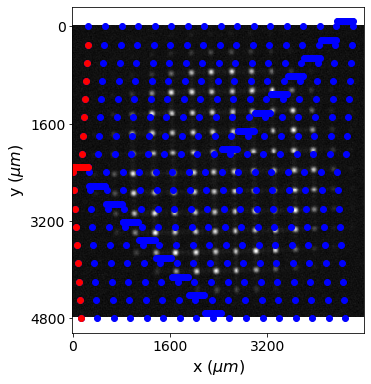

In [132]:
plt.figure(figsize=(6,6))
plt.imshow(rot_crop_img, cmap='gray')
arr = np.arange(0, stop=300, step=0.1875)

plt.xticks([0, 100, 200, 300], [0, 1600, 3200, 4800], fontsize=14)
plt.yticks([0, 100, 200, 300], [0, 1600, 3200, 4800], fontsize=14)
plt.xlabel(r'x ($\mu m$)', fontsize=16)
plt.ylabel(r'y ($\mu m$)',fontsize=16)

plt.plot(spotcoords, marker='o', color='blue', linestyle='')

plt.plot(spotcoords[0:16], marker='o', color='red', linestyle='')
# Something funky is going on, seemingly because of the way i separated it into an above/below the center spot

In [74]:
max_separation_pix

150.0

In [91]:
18.75**2

351.5625